In [ ]:
from egnn_pytorch.egnn_pytorch_geometric import EGNN_Network, EGNN_Sparse_Network
import numpy as np
import networkx as nx
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.append('/Users/xuefengli/24fall/DeepAesthetic/DeepGD')  # Replace with the directory path
from deepgd.datasets import  RomeDataset



# Preprocessor Datasets

In [ ]:
dataset = RomeDataset(
    index=pd.read_csv("/Users/xuefengli/24fall/DeepAesthetic/DeepGD/assets/rome_index.txt", header=None)[0],
)
pmds_path = "/Users/xuefengli/24fall/DeepAesthetic/assets/layouts/pmds.npy"
layouts = np.load(pmds_path, allow_pickle=True)
# datasets = layouts[0:10]
# print(len(datasets))
# print(datasets)


In [ ]:
datalist = list(dataset)
for i, data in enumerate(datalist):
    if i > 100:
        break
    data.pos = torch.tensor(layouts[i]).float()
train_datalist = datalist[0:90]
test_datalist = datalist[90:100]

In [ ]:
def draw(coors):
    coors_out = coors[0].detach().cpu().numpy()

    # Create a graph
    G = nx.Graph()

    # Add nodes with 2D coordinates as positions
    for i, (x, y) in enumerate(coors_out):
        G.add_node(i, pos=(x, y))

    # Connect nodes based on nearest neighbors
    distances = distance_matrix(coors_out, coors_out)  # Calculate distance matrix
    num_nearest_neighbors = 8  # Number of nearest neighbors to connect

    for i in range(len(coors_out)):
        # Find indices of the closest neighbors (excluding self)
        neighbors = distances[i].argsort()[1:num_nearest_neighbors + 1]
        for j in neighbors:
            G.add_edge(i, j)  # Add an edge between the node and its neighbors

    # Plot the graph
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_size=10, node_color="blue", edge_color="gray", alpha=0.7)
    plt.title("Graph of 2D Coordinates Output from EGNN")
    plt.show()

# Toy Test for EGNN

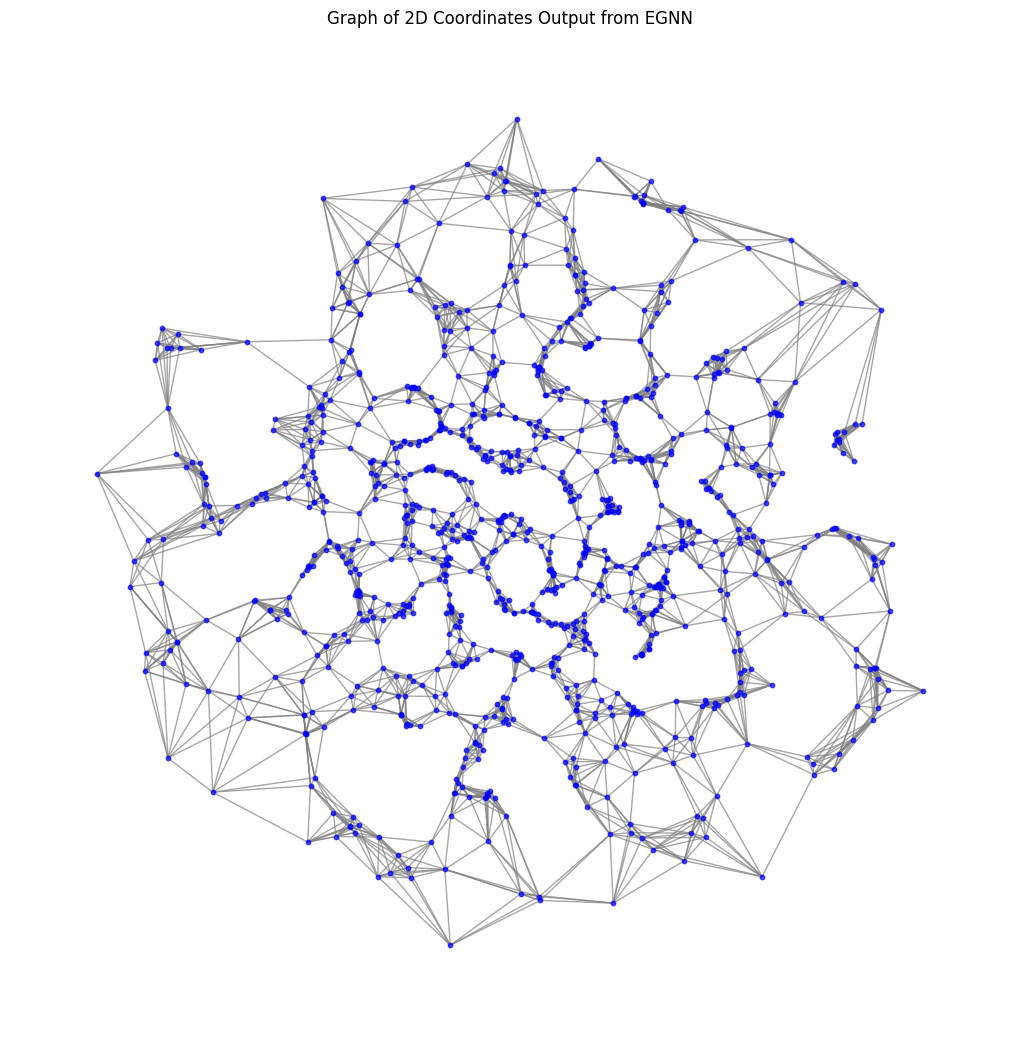

In [86]:
import torch
from egnn_pytorch import EGNN_Network

net = EGNN_Network(
    num_tokens = 21,
    num_positions = 1024,           # unless what you are passing in is an unordered set, set this to the maximum sequence length
    dim = 32,
    depth = 3,
    num_nearest_neighbors = 8,
    coor_weights_clamp_value = 2.   # absolute clamped value for the coordinate weights, needed if you increase the num neareest neighbors
)

feats = torch.randint(0, 21, (1, 1024)) # (1, 1024)
coors = torch.randn(1, 1024, 2)         # (1, 1024, 3)
mask = torch.ones_like(feats).bool()    # (1, 1024)

feats_out, coors_out = net(feats, coors, mask = mask) # (1, 1024, 32), (1, 1024, 3)
draw(coors_out)

# Model

In [ ]:
model = EGNN_Network(
    num_tokens = 21,
    num_positions = 1024,
    dim = 32,
    depth = 10,
    coor_weights_clamp_value = 2. 
)

In [ ]:
print(datalist[0])
print(datalist[0].pos)
print(datalist[0].G.edges)
datalist[0].draw()

In [ ]:
m=0
for data in train_datalist:
    m = max(len(data.G.nodes), m)
for data in test_datalist:
    m = max(len(data.G.nodes), m)
print(m)

# Train

In [ ]:
epoches = 100

In [85]:
from tqdm import tqdm


def train():
    for epoch in range(epoches):
        for batch in tqdm(train_datalist):
            

SyntaxError: incomplete input (1595120296.py, line 7)